In [1]:
import datetime as dt
import numpy as np
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data

In [2]:
from sklearn import mixture as mix

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import talib as ta
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [8]:
import quandl
quandl.ApiConfig.api_key = "uhX9yen-ZYxNzx32r6q4"

In [20]:
end = dt.date.today()
start = dt.datetime(end.year-5,end.month,end.day)
df = pd.DataFrame(data.DataReader('BSE/BOM523395', 'quandl', start=start, end=end ))  #3M India
df

,Open,High,Low,Close,WAP,NoofShares,NoofTrades,TotalTurnover,DeliverableQuantity,DeliQtytoTradedQty,SpreadHL,SpreadCO
Date,,,,,,,,,,,,
2018-11-07,19951.00,20399.00,19951.00,20346.70,20324.530000,104.0,64.0,2113751.0,71.0,68.27,448.00,395.70
2018-11-06,20155.25,20155.25,19700.00,19855.55,19879.910000,174.0,120.0,3459105.0,56.0,32.18,455.25,-299.70
2018-11-05,20500.00,20500.00,19909.00,20155.25,20248.740000,140.0,104.0,2834824.0,50.0,35.71,591.00,-344.75
2018-11-02,20014.65,20482.00,19686.60,20247.60,20120.880000,197.0,149.0,3963814.0,83.0,42.13,795.40,232.95
2018-11-01,20164.25,20164.25,19377.00,19932.60,19835.140000,219.0,150.0,4343896.0,87.0,39.73,787.25,-231.65
2018-10-31,19900.05,20139.85,19585.80,19853.35,19805.840000,223.0,141.0,4416703.0,107.0,47.98,554.05,-46.70
2018-10-30,19877.40,20400.00,19877.40,20212.85,20174.990000,130.0,98.0,2622749.0,58.0,44.62,522.60,335.45
2018-10-29,19780.00,20417.05,19528.00,19733.00,19844.810000,347.0,181.0,6886149.0,152.0,43.80,889.05,-47.00
2018-10-26,19605.00,19674.00,19150.10,19307.70,19483.710000,216.0,130.0,4208482.0,130.0,60.19,523.90,-297.30


In [21]:
df = df[['Open', 'High', 'Low', 'Close']]
df.describe()

,Open,High,Low,Close
count,1232.000000,1232.000000,1232.000000,1232.000000
mean,11661.581818,11819.290584,11497.799513,11642.194440
std,5527.729457,5602.549762,5443.855417,5516.581944
min,3111.050000,3199.000000,3099.000000,3106.050000
25%,7063.712500,7201.700000,7005.250000,7054.862500
50%,11330.925000,11502.700000,11197.000000,11331.600000
75%,14100.000000,14315.500000,13873.225000,14067.275000
max,26150.000000,26679.250000,25900.000000,26109.600000


In [22]:
#Spliting the data 80% for testing and 20% for training
n = 10
t = 0.8
split = int(t*len(df))
print(split)

985


In [23]:
# print(df['High'][:split])
# print(df['High'].shift(1))
#I created various technical indicators such as, RSI, SMA, ADX, Correlation, 
#Parabolic SAR, and the Return of the past 1- day on an Open to Open basis.

# df['High'] = df['High'].shift(1)
# df['Low'] = df['Low'].shift(1)
# df['Close'] = df['Close'].shift(1)
df['RSI']= ta.RSI(np.array(df['Close']), timeperiod=n)
df['SMA']= df['Close'].rolling(window=n).mean()
df['Corr']= df['SMA'].rolling(window=n).corr(df['Close'])
df['SAR']= ta.SAR(np.array(df['High']),np.array(df['Low']),0.2,0.2)
df['ADX']= ta.ADX(np.array(df['High']),np.array(df['Low']),np.array(df['Close']), timeperiod=n)
df['Return']= np.log(df['Open']/df['Open'].shift(1))

df = df.dropna()
df


c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Open,High,Low,Close,RSI,SMA,Corr,SAR,ADX,Return
Date,,,,,,,,,,
2018-10-10,21275.00,22550.00,21275.00,22447.55,64.022565,21608.635,0.719972,22875.900000,31.559917,-0.030777
2018-10-09,21798.75,21799.95,21251.00,21475.25,51.440370,21771.950,0.513525,22555.720000,29.290722,0.024320
2018-10-08,21899.95,21899.95,21100.00,21662.85,53.403577,21985.240,0.173174,22550.000000,26.723787,0.004632
2018-10-05,22490.00,22500.95,21620.95,21980.95,56.701579,22099.545,-0.225091,21100.000000,26.106742,0.026586
2018-10-04,22520.95,22811.50,21252.65,22487.40,61.519597,22178.985,-0.318702,21100.000000,24.263392,0.001375
2018-10-03,23180.00,23700.00,22408.65,22512.15,61.750705,22250.570,-0.475183,21252.650000,24.659836,0.028844
2018-10-01,22556.05,23249.95,21750.00,22987.20,66.093602,22274.120,-0.082665,21252.650000,23.029642,-0.027287
2018-09-28,22700.00,23260.65,22011.00,22440.30,57.711642,22235.165,0.268798,21742.120000,21.588028,0.006362
2018-09-27,23399.95,23399.95,22520.00,22664.90,60.024955,22260.140,0.537828,21750.000000,20.644994,0.030369


# Standard Scaler

c:\program files (x86)\python36-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


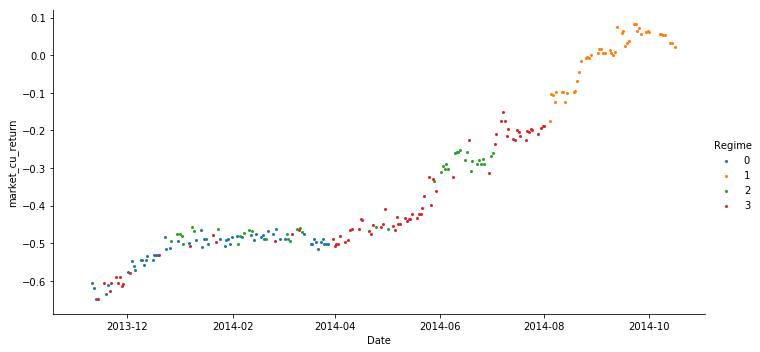

Mean for regime 0: -1.1768500767986596
Co-Variance for regime 0: 0.3046021874493226
Mean for regime 1: 1.6595846432354284
Co-Variance for regime 1: 0.5364926685455862
Mean for regime 2: -0.05483824738181528
Co-Variance for regime 2: 0.2430304755609048
Mean for regime 3: -0.3631505947936474
Co-Variance for regime 3: 0.6630849249395497


In [24]:
ss = StandardScaler()
unsup = mix.GaussianMixture(n_components=4,covariance_type='spherical', n_init=100, random_state=42)
#df = df.drop(['High','Low','Close'], axis=1)
unsup.fit(np.reshape(ss.fit_transform(df[:split]),(-1, df.shape[1])))
regime=unsup.predict(np.reshape(ss.fit_transform(df[split:]),(-1, df.shape[1])))
Regimes= pd.DataFrame(regime, columns=['Regime'],index=df[split:].index).join(df[split:], how='inner').assign(market_cu_return=df[split:].Return.cumsum()).reset_index(drop=False).rename(columns={'index':'Date'})

orders=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes, hue='Regime', hue_order=orders, aspect=2, size=5)
fig.map(plt.scatter, 'Date', 'market_cu_return', s=4).add_legend()
plt.show()

for i in orders:
    print("Mean for regime %i:"%i,unsup.means_[i][0])
    print('Co-Variance for regime %i:'%i,(unsup.covariances_[i]))

In [25]:
ss1 = StandardScaler()
columns = Regimes.columns.drop(['Regime','Date'])
Regimes[columns] = ss1.fit_transform(Regimes[columns])
Regimes['Signal'] = 0
Regimes.loc[Regimes['Return']>0, 'Signal'] = 1
Regimes.loc[Regimes['Return']<0, 'Signal'] = -1

In [26]:
cls = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',max_iter=-1,probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

In [27]:
split2 = int(.8*len(Regimes))

X = Regimes.drop(['Signal','Return', 'market_cu_return', 'Date'], axis=1)
y = Regimes['Signal']
cls.fit(X[:split2],y[:split2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
print(len(X))
p_data = len(X)-split2
print(p_data)

228
46


In [29]:
df['Pred_Signal']=0
df.iloc[-p_data:,df.columns.get_loc('Pred_Signal')] = cls.predict(X[split2:])
print(df['Pred_Signal'][-p_data:])
df['str_ret'] = df['Pred_Signal']*df['Return'].shift(-1)

Date
2014-01-15    1
2014-01-14    1
2014-01-13    1
2014-01-10    1
2014-01-09    1
2014-01-08    1
2014-01-07    1
2014-01-06    1
2014-01-03    1
2014-01-02    1
2014-01-01    1
2013-12-31    1
2013-12-30    1
2013-12-27    1
2013-12-26    1
2013-12-24    1
2013-12-23    1
2013-12-20    1
2013-12-19    1
2013-12-18    1
2013-12-17    1
2013-12-16    1
2013-12-13    1
2013-12-12    1
2013-12-11    1
2013-12-10    1
2013-12-09    1
2013-12-06    1
2013-12-05    1
2013-12-04    1
2013-12-03    1
2013-12-02    1
2013-11-29    1
2013-11-28    1
2013-11-27    1
2013-11-26    1
2013-11-25    1
2013-11-22    1
2013-11-21    1
2013-11-20    1
2013-11-19    1
2013-11-18    1
2013-11-14    1
2013-11-13    1
2013-11-12    1
2013-11-11    1
Name: Pred_Signal, dtype: int64


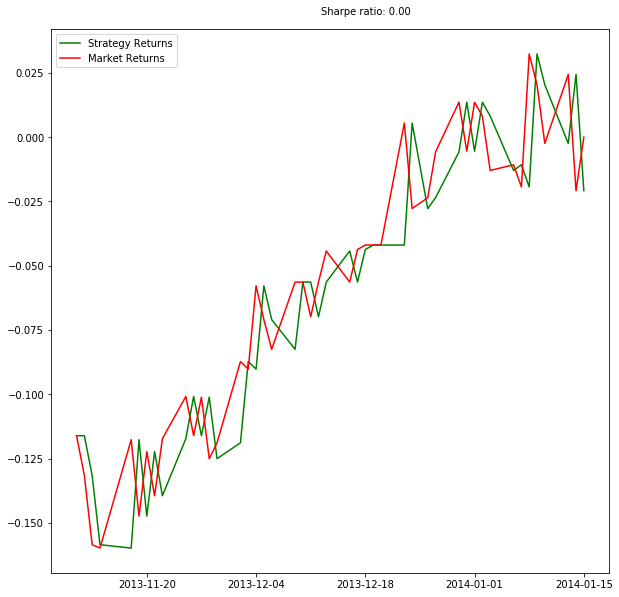

In [30]:
df['strategy_cu_return']=0
df['market_cu_return']=0
df.iloc[-p_data:,df.columns.get_loc('strategy_cu_return')] = np.nancumsum(df['str_ret'][-p_data:])
df.iloc[-p_data:,df.columns.get_loc('market_cu_return')] = np.nancumsum(df['Return'][-p_data:])
Sharpe = (df['strategy_cu_return'][-1]-df['market_cu_return'][-1])/np.nanstd(df['strategy_cu_return'][-p_data:])
df.dropna()

fig= plt.subplots(figsize = (10,10))
plt.plot(df['strategy_cu_return'][-p_data:], color='g', label='Strategy Returns')
plt.plot(df['market_cu_return'][-p_data:], color='r', label='Market Returns')
plt.figtext(0.5,0.9, s='Sharpe ratio: %.2f'%Sharpe)
plt.legend(loc='best')
plt.show()